HTRU2 pulsar candidate dataset - http://archive.ics.uci.edu/ml/datasets/HTRU2#

Algorithms Used
PCA
K-means
K-means PCA
Meanshift
Agglomerative clustering
Gaussian Mixture

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np

In [2]:
path = 'data/HTRU2/HTRU_2.csv'

In [3]:
full = pd.read_csv(path, header=None)
train = full.drop(8, 1)

In [5]:
labels = full.as_matrix(columns=[8])
class_names=[0,1]
#Number of true labels
print ('{}% of the data is true labels'.format(np.count_nonzero(labels)/len(full)*100))

9.157447759526203% of the data is true labels


In [6]:
#Normalize data
scaler = StandardScaler()
train = scaler.fit_transform(train)

In [7]:
def accmetrics(labels, preds):
    prec = precision_score(labels, preds)*100
    rand = metrics.adjusted_rand_score(labels.squeeze(), preds.squeeze())*100
    return rand, prec 

In [8]:
def visualize(predictions, pca_2d):
    for i in range(0, pca_2d.shape[0]):
        if predictions[i] == 0:
            c1 = plt.scatter(pca_2d[i, 0], pca_2d[i,1], c='r', marker='+')
        elif predictions[i] == 1:
            c2 = plt.scatter(pca_2d[i, 0], pca_2d[i,1], c='g', marker='o')
    
    plt.legend([c1, c2], ['Negative', 'Pulsar'])
    plt.title('Pulsar detection')
    plt.show()

In [9]:
#Plot confusion matrix given the calculated matrix and classes.
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Dimensionality
Dimensionality refers to the minimum number of coordinates/features needed to specify any point within a space or an object. In this case we have a point defined by $\mathbb{R}^8$.

<b>Dimensionality reduction</b> for one, makes visualisation possible which is of practical interest because many statistical and machine learning algorithms have very poor optimality guarantees. Simpler set of features also means easier analysis. On the other hand, if the dimensionality high, it will be nice and unique but it may not be easy to analyze because of the complexity involved. Balancing this tradeoff is a key component of dimensionality reduction.  

### PCA 2 components
An example of <b>linear dimensionality reduction</b>. PCA finds the directions along which the data has maximum variance in addition to the relative importance of these directions. It is calculated using the Eigen Decomposition/ Singular Value Decomposition(SVD) of the data. 

In [10]:
pca = PCA(n_components=2).fit(train)

In [11]:
pca_2d = pca.transform(train)

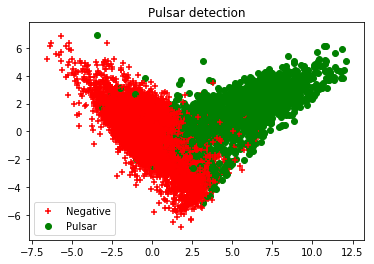

In [12]:
visualize(labels, pca_2d)

## Clustering

### K-means

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train)

In [14]:
predictions = kmeans.predict(train[:].reshape(-1,8))

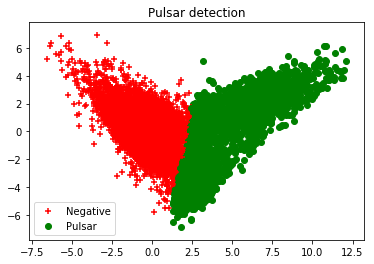

Rand index, Precision: (60.71428892458998, 62.27515799708313)%


In [15]:
visualize(predictions.reshape(-1,1), pca_2d)
print ("Rand index, Precision: {}%".format(accmetrics(labels, predictions)))

### Kmeans on PCA

In [94]:
%time kmeans_pca = KMeans(n_clusters=2, random_state=0).fit(pca_2d)

CPU times: user 227 ms, sys: 734 ms, total: 961 ms
Wall time: 139 ms


In [95]:
predictions_pca = kmeans_pca.predict(pca_2d[:])

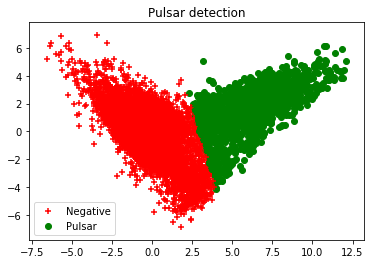

Rand index, Precision: (75.39124023572685, 93.8423645320197)%


In [18]:
visualize(predictions_pca.reshape(-1,1), pca_2d)
print ("Rand index, Precision: {}%".format(accmetrics(labels, predictions_pca)))

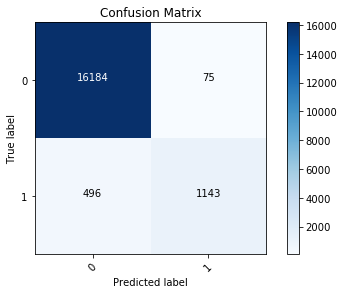

In [22]:
cnf_matrix = confusion_matrix(labels, predictions_pca, labels=class_names)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()


### Meanshift

In [24]:
%time est = estimate_bandwidth(pca_2d, 0.9)

In [25]:
ms = MeanShift(bin_seeding=True)

In [26]:
%time ms.fit(pca_2d)
predictions_ms = ms.labels_ 
n_clusters_ = len(np.unique(predictions_ms)); n_clusters_

3

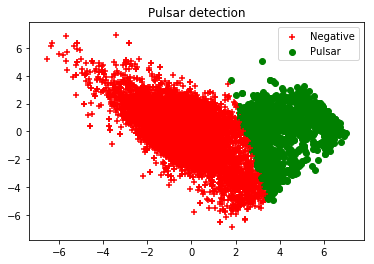

Rand index, Precision: (76.38539973441671, 87.6770538243626)%


In [30]:
visualize(predictions_ms.reshape(-1,1), pca_2d)
print ("Rand index, Precision: {}%".format(accmetrics(labels, predictions_ms.clip(0,1))))

### Agglomerative Clustering

In [53]:
%time agg_clus = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="l1").fit(pca_2d)

CPU times: user 6.53 s, sys: 90 ms, total: 6.62 s
Wall time: 6.61 s


In [54]:
predictions_ac = agg_clus.labels_ 

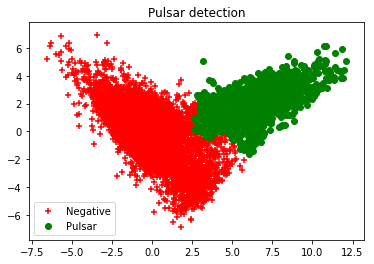

Rand index, Precision: (72.91847651651067, 98.13606710158435)%


In [55]:
visualize(predictions_ac.reshape(-1,1), pca_2d)
print ("Rand index, Precision: {}%".format(accmetrics(labels, predictions_ac)))

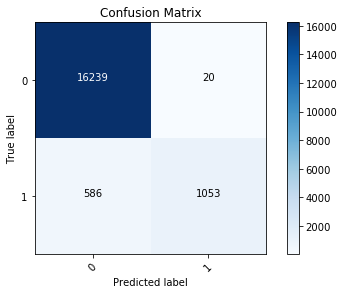

In [56]:
cnf_matrix = confusion_matrix(labels, predictions_ac, labels=class_names)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Gaussian Mixture Models

In [120]:
%time gauss_mix = BayesianGaussianMixture(n_components=2, covariance_type="full").fit(pca_2d)

CPU times: user 93.9 ms, sys: 384 ms, total: 478 ms
Wall time: 94.4 ms


In [121]:
predictions_gaussm = gauss_mix.predict(pca_2d[:])

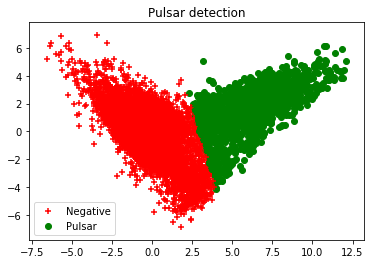

Rand index, Precision: (75.39124023572685, 93.8423645320197)%


In [59]:
visualize(predictions_gaussm.reshape(-1,1), pca_2d)
print ("Rand index, Precision: {}%".format(accmetrics(labels, predictions_gaussm)))